# Exercici contorns

Donada la image "Imatges/coins.jpg" fer servir canny i postprocessament basat en anàlisi de contorns per a detectar les monedes

<img src="Imatges/coins.jpg">



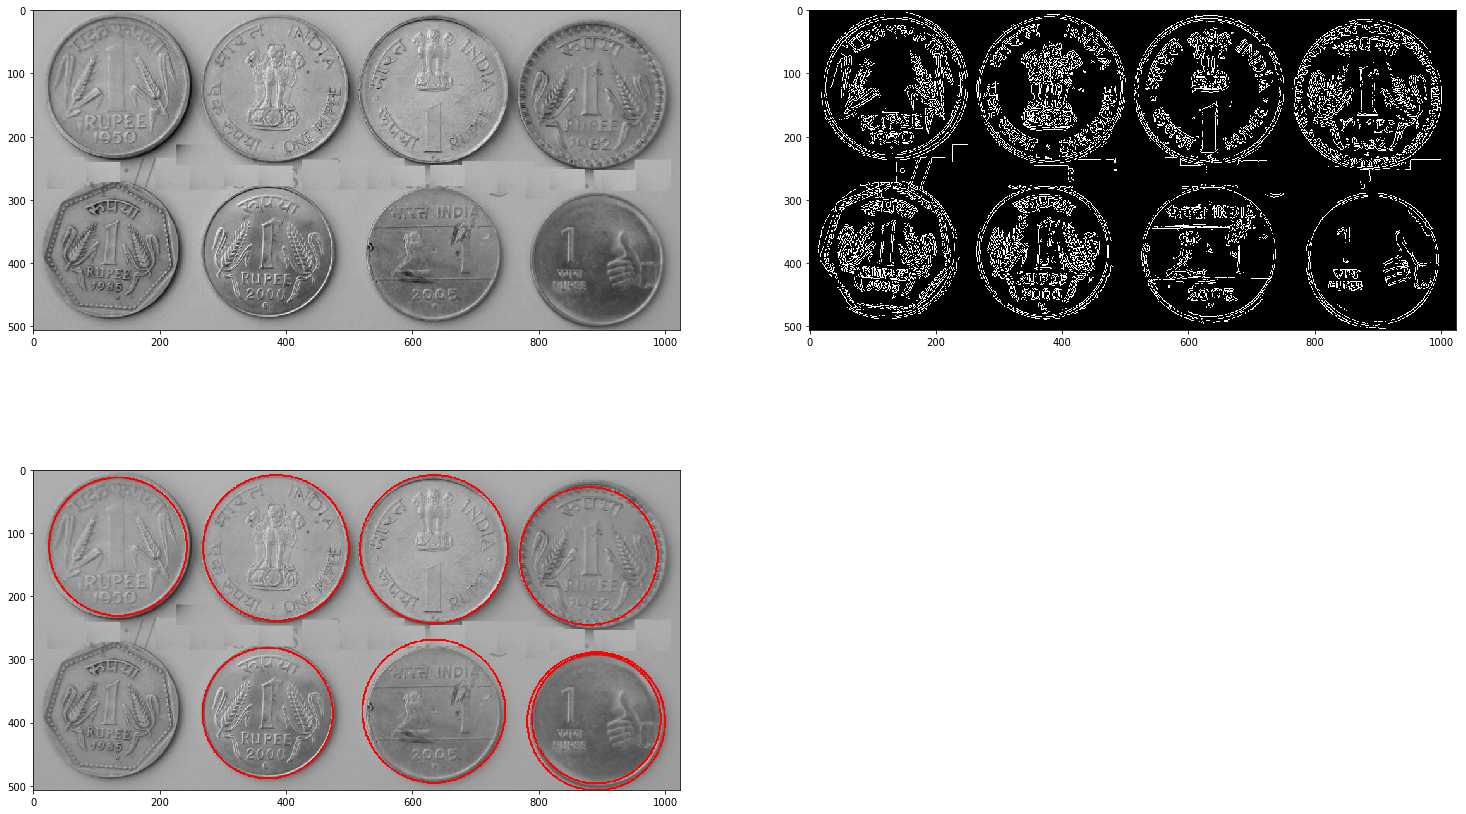

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


im = cv2.imread('Imatges/coins.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(im,50, 100, apertureSize=3)

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(edges, cmap='gray')
fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)



#morphology
kernel = np.ones((5,5), np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


# contours
_,contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im_blobs = np.zeros((im.shape[0],im.shape[1],3),dtype = np.uint8)
im_blobs[:,:,0] = im
im_blobs[:,:,1] = im
im_blobs[:,:,2] = im


# Ens basarem en el radi del minim cercle que conté el contorn
for c in contours:
    #area = cv2.contourArea(c)
    #if area > 50:
    #cv2.drawContours(im_blobs, c, -1, (0,255,0), 3)
    center, radius = cv2.minEnclosingCircle(c)
    if radius > 100 and radius < 120:
        im_blobs = cv2.circle(im_blobs, (int(center[0]), int(center[1])), int(radius),(255,0,0), 2)

plt.subplot(2,2,3)
plt.imshow(im_blobs)
    
  
###  Valors Canny:  50,100,3

In [30]:
cv2.__version__

'3.4.1'

# Exercici keypoints

Donada la imatge "Imatges/cocacola_logo.jpg", buscar quants logos de CocaCola hi ha en la imatge "Imatges/cocacola_groups.jpg". Es recomana fer servir descriptors ORB 

Es proporciona un petit codi de suport per tal de recòrrer una imatge amb una finestra lliscant.

<table>
    <tr>
        <td><center><img src="Imatges/cocacola_logo.jpg">cocacola_logo.jpg</center></td>
        <td><center><img src="Imatges/cocacola_groups.jpg">cocacola_groups.jpg</center></td>
    </tr>
</table>
    




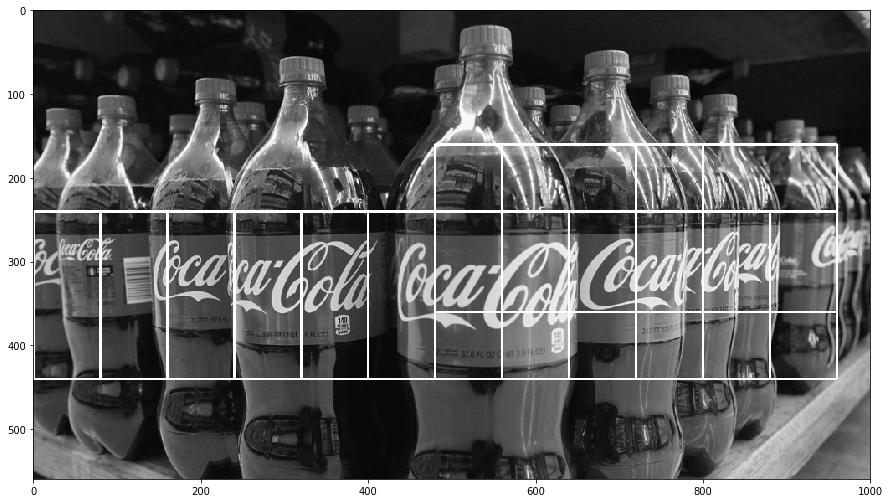

In [31]:
# Escanejant la imatge amb una sliding window

import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window #yield es com un return pero no guarda valors en memoria
            # retorna posicio x,y i finestra que conté la imatge (ROI)
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])  
            
           
            
# llegir les 2 imatges
logo = cv2.imread('Imatges/cocacola_logo.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('Imatges/cocacola_groups.jpg', cv2.IMREAD_GRAYSCALE)
img_result = img.copy() # per mostrar els resultats

# la imatge de coca-coles es 560*1000 pixels
rows,cols= img.shape

# Inicialitzem el descriptor 
orb = cv2.ORB_create()
# obtenim els keypoints i els seus descriptors per a la imatge del logo
kp1, des1 = orb.detectAndCompute(logo,None)


# loop sobre la sliding window
winW=240
winH=200
stepSize= 80
for (x, y, window) in sliding_window(img, stepSize, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
 
    # Aquí es on es pot fer el processat de la finestra retornada...

    # obtenim els keypoints i els seus descriptors per a la finestra actual
    kp2, des2 = orb.detectAndCompute(window,None)
    # un cop tenim els keypoints i descriptors d'ambdós imatges, intentem aparellar-los per força bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    
    if len(matches) > 220:
        # En altres versions de opencv (v.4.1.1.26), es comporta diferent. Fixant 120 en comptes de 220 sortia correcte.
        # Considerem que ha de detectar mes de 220 keypoints. Sinó, practicament a cada finestra detecta positius
    
        # Els ordenem per distància
        matches = sorted(matches, key = lambda x:x.distance)

        # Mostrem els 15 més similars sobre la finestra lliscant
        #img3 = cv2.drawMatches(logo,kp1,window,kp2,matches[:15], None,flags=2)
               
        # Dibuixo la sliding window sobre la imatge original. Només quan tenim matches (if matches>120)
        #img_result = img.copy()
        img_result = cv2.rectangle(img_result, (x, y), (x + winW, y + winH), (255, 255, 0), 2)
        
     

plt.imshow(img_result,cmap='gray')
fig = plt.gcf()
fig.set_size_inches(15, 15)






# Exercici PCA i Clustering

Fent servir PCA i K-means, deduir el nombre real de clústers presents en el dataset mnist. Suggeriment: fer servir el mètode "elbow" 



(4000,)

(4000, 784)

nombre components per a retenir el 95% de la variança 147
(4000, 147)


Text(0.5,0,'k')

Text(0,0.5,'SSw(k)')

Text(0.5,1,'tècnica elbow per trobar el k òptim')

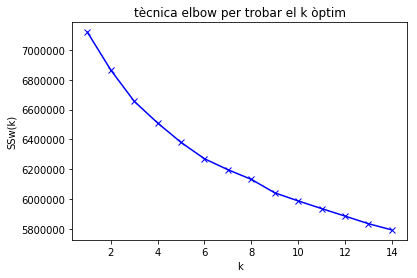

In [40]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Mnist té la forma de 4000 files per 28x28 columnes  [4000,784]
mnist = np.load('Data/mnist.npy')
# les etiquetes tenen 4000 files per 1 columna (el dígit representat)
labels = np.load('Data/mnist_labels.npy',allow_pickle=True)

labels.shape
mnist.shape


# calculem un PCA per a quedar-nos amb el 95% de la variança
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(mnist)

print("nombre components per a retenir el 95% de la variança {}".format(pca.n_components_))
# Podem treballar només amb 147 de les dimensions, no calen les 784 (28x28 pixels).
print(lower_dimensional_data.shape)
# [4000,147]


# ******************* kmeans i métode del colze (elbow) *******************************
# Executarem K-means per a k de 1 a 14.  Llibreria utilitzada: sklearn, no opencv
# les dades d'entrada seran els PCA calculats anteriorment
max_k = 15 ## maxim numero de clusters a testejar
K = range(1,max_k)
ssw = []
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(lower_dimensional_data)  
    
    ssw_k = sum(np.min(cdist(lower_dimensional_data, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    

#Representació del "elbow"
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("tècnica elbow per trobar el k òptim")
plt.show()



# Exercici SOM

Entrenar una xarxa tipus SOM amb les dades de MNIST i fer-la servir per clusteritzar MNIST. Com de bé representen les cel·les de la SOM les etiquetes de les dades?


In [35]:
from minisom import MiniSom
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Mnist té la forma de 4000 files per 28x28 columnes
mnist = np.load('Data/mnist.npy', allow_pickle=True)
labels = np.load('Data/mnist_labels.npy', allow_pickle=True)

som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.3, neighborhood_function='triangle')
som.pca_weights_init(mnist)
#som.random_weights_init(mnist)
som.train_random(mnist, 5000, verbose=True)

/usr/local/lib/python3.6/dist-packages/minisom.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1124.4215666622108
 topographic error: 0.962


In [38]:
qnt = som.quantization(mnist)

<Figure size 576x576 with 0 Axes>

[0, 30, 0, 30]

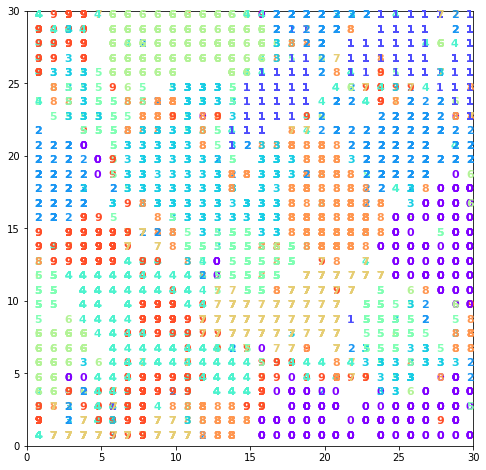

In [41]:
plt.figure(figsize=(8,8))
wmap = {}
im = 0

for x, t in zip(qnt, labels):
    w = som.winner(x)
    wmap[w] = im
    text = plt.text(w[0]+.5, w[1]+.5, t, color=plt.cm.rainbow(float(t) / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1

plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som_digts.png')
plt.show()